# 4.7 Lab: Classification Methods

## 4.7.1 The Stock Market Data


We will begin by examining some numerical and graphical summaries of
the `Smarket` data, which is part of the `ISLR2` library. This
data set consists of percentage returns for the S\&P 500 stock index
over $1,250$~days, from the beginning of 2001 until the end of
2005. For each date, we have recorded the percentage returns for each
of the five previous trading days, `lagone` through `lagfive`. We
have also recorded `volume` (the number of shares traded on the previous day, in billions), `Today` (the percentage return on the date in question)  and `direction` (whether the market was `Up` or `Down` on this date). Our goal is to predict `direction` (a qualitative response) using the other features.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import math
from patsy import dmatrices
import statsmodels.discrete.discrete_model as sm
import statsmodels.formula.api as smf
import statsmodels.api as sma
from statsmodels.graphics.regressionplots import *
from sklearn import datasets, linear_model
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, ConfusionMatrixDisplay
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression as LR

import seaborn as sns
sns.set_theme()
sns.set_style("ticks")


In [3]:
Smarket = pd.read_csv('https://raw.githubusercontent.com/tvanzyl/Sharing_ISL_python/master/data/Smarket.csv', 
                      dtype={'Direction':'category'},
                      header=0)

Index(['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today',
       'Direction'],
      dtype='object')
(1250, 9)
              Year         Lag1         Lag2         Lag3         Lag4  \
count  1250.000000  1250.000000  1250.000000  1250.000000  1250.000000   
mean   2003.016000     0.003834     0.003919     0.001716     0.001636   
std       1.409018     1.136299     1.136280     1.138703     1.138774   
min    2001.000000    -4.922000    -4.922000    -4.922000    -4.922000   
25%    2002.000000    -0.639500    -0.639500    -0.640000    -0.640000   
50%    2003.000000     0.039000     0.039000     0.038500     0.038500   
75%    2004.000000     0.596750     0.596750     0.596750     0.596750   
max    2005.000000     5.733000     5.733000     5.733000     5.733000   

             Lag5       Volume        Today  
count  1250.00000  1250.000000  1250.000000  
mean      0.00561     1.478305     0.003138  
std       1.14755     0.360357     1.136334  
min      -4.92200     

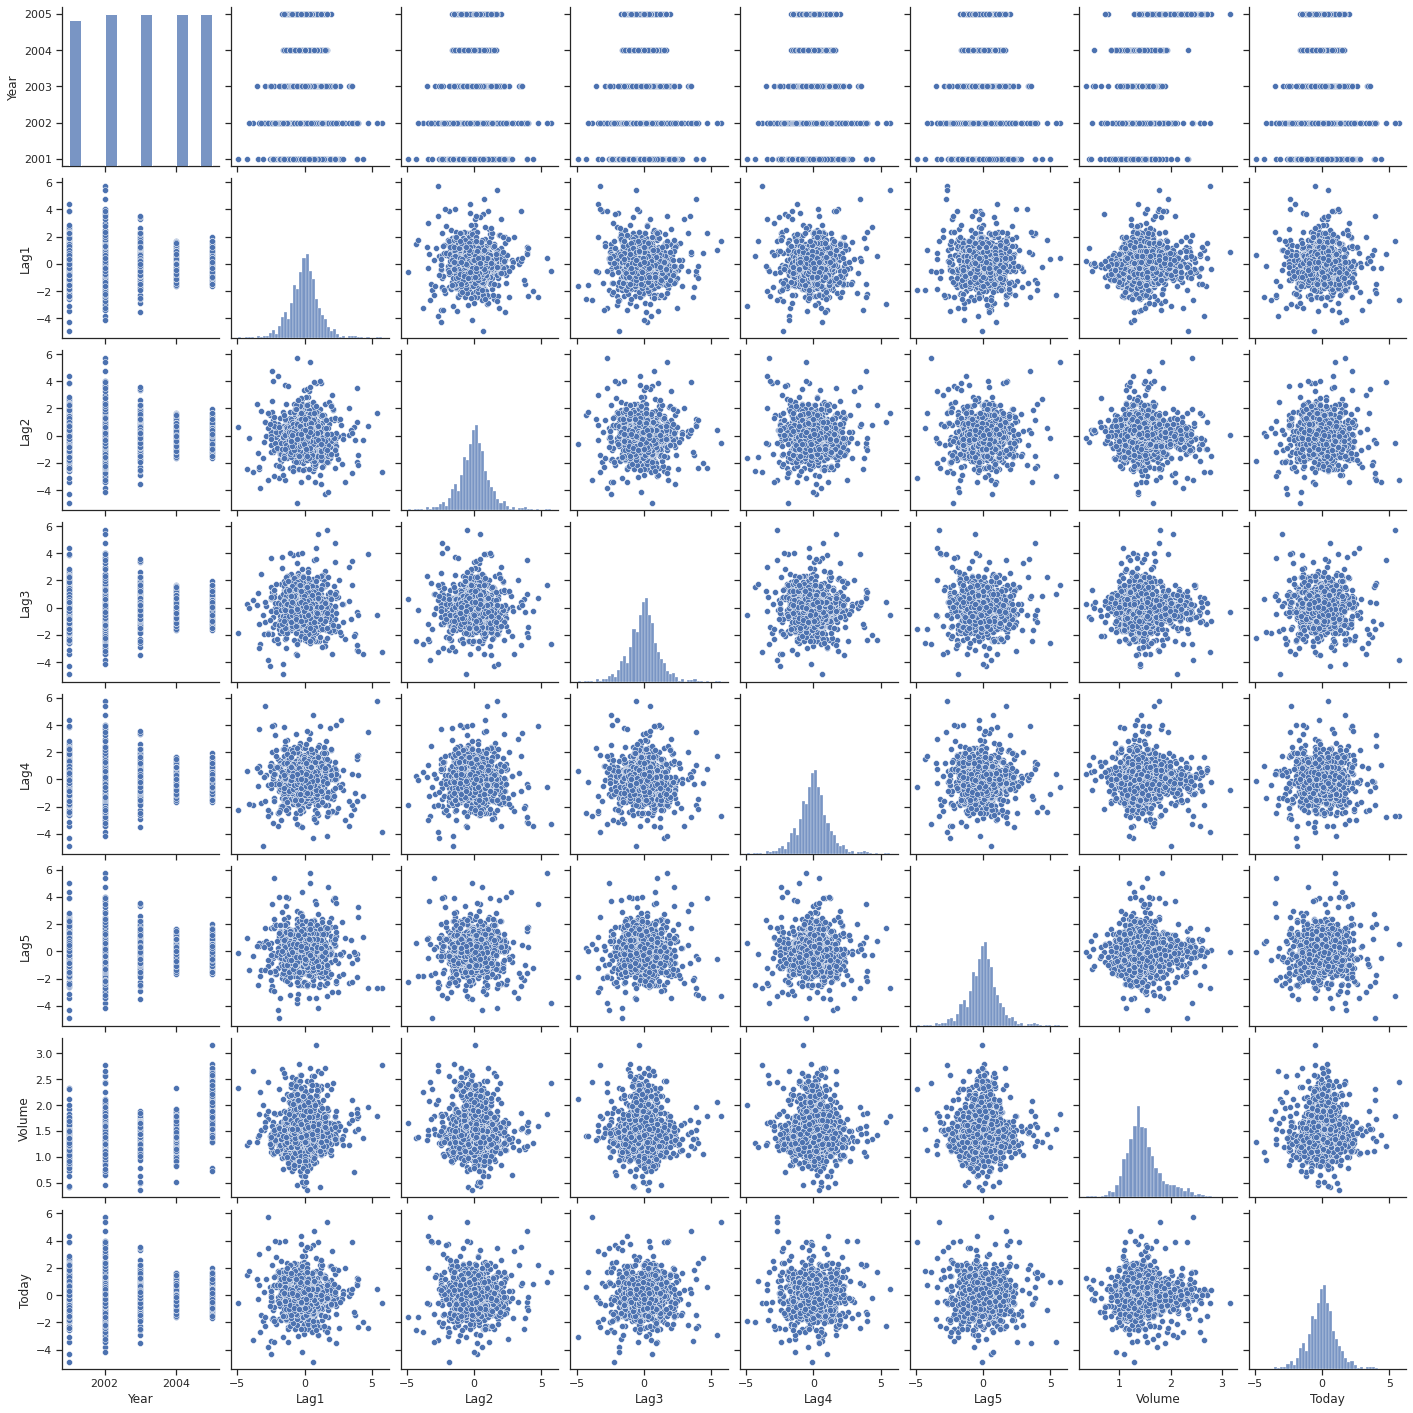

In [4]:
print(Smarket.columns)
print(Smarket.shape)
print(Smarket.describe())
sns.pairplot(Smarket);

For panda data frame, there is a method `corr()` that produces a matrix that contains all of the pairwise correlations among the predictors in a data set.

In [5]:
Smarket.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000


As one would expect, the correlations between the lag variables and today's returns are close to zero. In other words, there appears to be little correlation between today's returns and previous days' returns. The only substantial correlation is between `Year` and `volume`. By plotting the data, which is ordered chronologically, we see that `volume` is increasing over time. In other words, the average number of shares traded daily increased from 2001 to 2005.

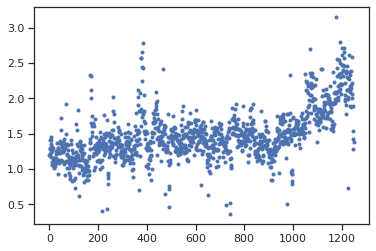

In [6]:
Smarket["Volume"].plot(style=".");

## 4.7.2 Logistic Regression

Next, we will fit a logistic regression model in order to predict `direction` using `lagone` through `lagfive` and `volume`. The `glm()` function  can be used to fit many types of generalized linear models , including logistic regression.

The syntax of the `glm()` function is similar to that of  `lm()`,  except that we must pass in the argument `family = Binomial()` in order to tell `python` to run a logistic regression rather than some other type of generalized linear model.

There are some known complications that in Sklearn about applying parameter regularization. This can be aviod to set the tuning parameter 'C' to a large number. Here to be consistent with R output, I decieded to use Statsmodels.

In [7]:
y, X = dmatrices('Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume', Smarket)
# y

glm is paramaterised against `Direction[Down]` meaning `Direction[Down]` is 1

In [8]:
logit = smf.glm('Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume', Smarket, family=sma.families.Binomial()).fit()
print(logit.summary())

                          Generalized Linear Model Regression Results                           
Dep. Variable:     ['Direction[Down]', 'Direction[Up]']   No. Observations:                 1250
Model:                                              GLM   Df Residuals:                     1243
Model Family:                                  Binomial   Df Model:                            6
Link Function:                                    Logit   Scale:                          1.0000
Method:                                            IRLS   Log-Likelihood:                -863.79
Date:                                  Fri, 30 Sep 2022   Deviance:                       1727.6
Time:                                          15:15:16   Pearson chi2:                 1.25e+03
No. Iterations:                                       4   Pseudo R-squ. (CS):           0.002868
Covariance Type:                              nonrobust                                         
                 coef    std e

The smallest $p$-value here is associated with `lagone`. The negative coefficient for this predictor suggests that if the market had a positive return yesterday, then it is less likely to go up today. However, at a value of $0.15$, the $p$-value is still relatively large, and so there is no clear evidence of a real association between `lagone` and `direction`. 

 We use the `params` attribute in order to access just the coefficients for this fitted model. We can also use the  attributes to access  particular aspects of the fitted model, such as the $p$-values for the coefficients.

In [9]:
logit.params

Intercept    0.126000
Lag1         0.073074
Lag2         0.042301
Lag3        -0.011085
Lag4        -0.009359
Lag5        -0.010313
Volume      -0.135441
dtype: float64

In [10]:
logit.pvalues

Intercept    0.600700
Lag1         0.145232
Lag2         0.398352
Lag3         0.824334
Lag4         0.851445
Lag5         0.834998
Volume       0.392404
dtype: float64

The `predict()` function can be used to predict the probability that the market will go up, given values of the predictors. The output is probabilities of the form $P(Y=1|X)$, as opposed to other information such as the logit. If no data set is supplied to the `predict()` function, then  the probabilities are computed for the training data that was used to fit the logistic regression model. Here we have printed only the first ten probabilities. 

> TODO: We know that these values correspond to the probability of the market going up, rather than down, because the `contrasts()` function indicates that `R` has created a dummy variable with a 1 for `Up`.

In [11]:
logit.predict()[0:10]

array([0.49291587, 0.51853212, 0.51886117, 0.48477764, 0.48921884,
       0.49304354, 0.50734913, 0.49077084, 0.48238647, 0.51116222])

In order to make a prediction as to whether the market will go up or down on a particular day, we must convert these predicted probabilities into class labels, `Up` or `Down`.
The following two commands create a vector of class predictions based on whether the predicted probability of a market increase is greater than or less than $0.5$.

In [12]:
predict_label = pd.DataFrame(["Down" if i==1 else "Up" for i in logit.predict()>0.5], 
                              columns=['Direction'],
                              index=Smarket.index)

The command creates a vector of 1,250  `Down=1` and `Up=0` elements for which the predicted probability of a market increase exceeds $0.5$. Given these predictions, the `ConfusionMatrixDisplay.from_predictions()` function can be used to produce a confusion matrix in order to determine how many observations were correctly or incorrectly classified. 

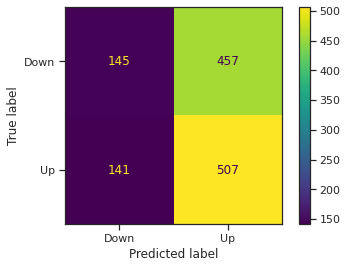

In [13]:
# we can evalue the TRAINING result by constructing a confusion matrix 
ConfusionMatrixDisplay.from_predictions(Smarket.Direction, predict_label.Direction);

The diagonal elements of the confusion matrix indicate correct predictions, while the off-diagonals represent incorrect predictions. Hence our model correctly predicted that the market would go up on $507$~days and that it would go down on $145$~days, for a total of $507+145 = 652$ correct predictions. The `mean()` function can be used to compute the fraction of days for which the prediction was correct. In this case, logistic regression correctly predicted the movement of the market  $52.2$\,\% of the time.

In [14]:
print(np.mean((Smarket.Direction == predict_label.Direction)))
# or use the confusion matrix to compute the accuracy 
cm = confusion_matrix(Smarket.Direction, predict_label.Direction)
print(cm.diagonal().sum()* 1.0 /cm.sum())

0.5216
0.5216


### Train-Validation Split

At first glance, it appears that the logistic regression model is working a little better than random guessing. However, this result is misleading because we trained and tested the  model on the same set of $1,250$ observations. In other words,
 $100\%-52.2\%=47.8\%$, is the *training* error   rate. As we have seen previously, the training error rate is often overly optimistic---it tends to underestimate the   test error rate.  In order to better assess the accuracy of the logistic regression model in this setting, we can fit the model using part of the data, and then examine how well it predicts the *held out* data.
This will yield a more realistic error rate, in the sense that in practice we will be interested in our model's performance not on the data that we used to fit the model, but rather on days in the future for which the market's movements are unknown.

To implement this strategy, we will first create a vector corresponding to the observations from 2001 through 2004. We will then use this vector to create a held out data set of observations from 2005.

In [15]:
Smarket_test = Smarket.query('Year >= 2005')
Smarket_train = Smarket.query('Year < 2005')

The object `Smarket` is a vector of $1,250$ elements, corresponding to the observations in our data set. The elements of the vector that correspond to observations that occurred before 2005 are set to `Smarket_train`, whereas those that correspond to observations in 2005 are set to `Smarket_test`.

The method `query` takes a *Boolean String* input, since its elements are eaither `True` and `False`. For instance, the object `Smarket_train` would pick out a submatrix of the stock market data set, corresponding only to the dates before 2005, since those are the ones for which the elements of `Year < 2005`.

Therefore, `Smarket_test` yields a submatrix of the stock market data containing only the observations for which `Year >= 2005` -- that is, the observations with dates in 2005. The output below indicates that there are 252 such observations.

In [16]:
Smarket_test.shape

(252, 9)

We now fit a logistic regression model using only the subset of the observations that correspond to dates before 2005. We then obtain predicted probabilities of the stock market going up for each of the days in our test set --- that is, for the days in 2005.

In [17]:
logit = smf.glm('Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume', Smarket_train, family=sma.families.Binomial()).fit()
print(logit.summary())

                          Generalized Linear Model Regression Results                           
Dep. Variable:     ['Direction[Down]', 'Direction[Up]']   No. Observations:                  998
Model:                                              GLM   Df Residuals:                      991
Model Family:                                  Binomial   Df Model:                            6
Link Function:                                    Logit   Scale:                          1.0000
Method:                                            IRLS   Log-Likelihood:                -690.55
Date:                                  Fri, 30 Sep 2022   Deviance:                       1381.1
Time:                                          15:15:17   Pearson chi2:                     998.
No. Iterations:                                       4   Pseudo R-squ. (CS):           0.002162
Covariance Type:                              nonrobust                                         
                 coef    std e

Notice that we have trained and tested our model on two completely separate data sets: training was performed using only the dates before 2005, and testing was performed using only the dates in 2005.
Finally, we compute the predictions for 2005 and compare them to the actual movements of the market over that time period.

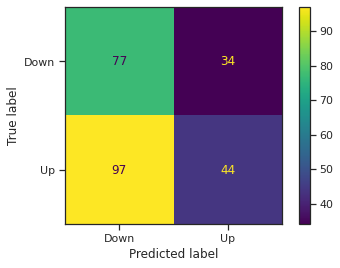

In [18]:
preds = logit.predict(Smarket_test)>0.5
predict_label = pd.DataFrame(["Down" if i==1 else "Up" for i in preds], 
                              columns=['Direction'],
                              dtype="category",
                              index=Smarket_test.index)
ConfusionMatrixDisplay.from_predictions(Smarket_test.Direction, predict_label.Direction);

In [19]:
print(np.mean((Smarket_test.Direction == predict_label.Direction)))
print(np.mean((Smarket_test.Direction != predict_label.Direction)))

0.4801587301587302
0.5198412698412699



The `!=` notation means *not equal to*, and  so the last command computes the  test set error rate.

The results are rather disappointing: the test error rate is $52$\,\%, which is worse than random guessing! Of course this result is not all that surprising, given that one would not generally expect to be able to  use previous days' returns to predict future market performance. (After all, if it were possible to do so, then the authors of this book would be out striking it rich rather than writing a statistics textbook.)

We recall that the logistic regression model had very underwhelming $p$-values associated with all of the predictors, and that the smallest $p$-value, though not very small, corresponded to `lagone`. Perhaps by removing the variables that appear not  to be helpful in predicting `direction`, we can obtain a more effective model. After all, using predictors that have no relationship with the response tends to cause a deterioration in the test error rate (since such predictors cause an increase in variance without a corresponding decrease in bias), and so removing such predictors may in turn yield an improvement.

Below we have refit the logistic regression using just `lagone` and `lagtwo`, which seemed to have the highest predictive power in the original logistic regression model.

0.5595238095238095
0.44047619047619047


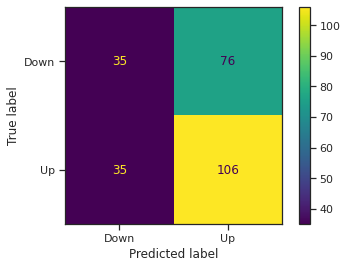

In [20]:
# the retrain of the model with Lag1 and Lag2 will be similar to previous steps (I will be brief here). 
logit = smf.glm('Direction~Lag1+Lag2', Smarket_train, family=sma.families.Binomial()).fit()
preds = logit.predict(Smarket_test)>0.5
predict_label = pd.DataFrame(["Down" if i==1 else "Up" for i in preds], 
                              columns=['Direction'],
                              dtype="category",
                              index=Smarket_test.index)
ConfusionMatrixDisplay.from_predictions(Smarket_test.Direction, predict_label.Direction)
print(np.mean((Smarket_test.Direction == predict_label.Direction)))
print(np.mean((Smarket_test.Direction != predict_label.Direction)))

Now the results appear to be a little better: $56\%$ of the daily movements have been correctly predicted. It is worth noting that in this case, a much simpler strategy of predicting that the market will increase every day will also be correct $56\%$ of the time! Hence, in terms of overall error rate, the logistic regression method is no better than the naive approach. However, the confusion matrix shows that on days when logistic regression predicts an increase in the market, it has a $58\%$ accuracy rate. This suggests a possible trading strategy of buying on days when the model predicts an increasing market, and avoiding trades on days when a decrease is predicted. Of course one would need to investigate more carefully whether this small improvement was real or just due to random chance.

Here we change the threshold to 0.49

0.5317460317460317
0.46825396825396826


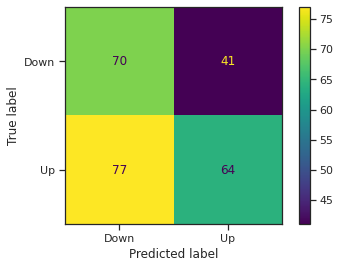

In [21]:
logit = smf.glm('Direction~Lag1+Lag2', Smarket_train, family=sma.families.Binomial()).fit()
preds = logit.predict(Smarket_test)>0.49
predict_label = pd.DataFrame(["Down" if i==1 else "Up" for i in preds], 
                              columns=['Direction'],
                              dtype="category",
                              index=Smarket_test.index)
ConfusionMatrixDisplay.from_predictions(Smarket_test.Direction, predict_label.Direction)
print(np.mean((Smarket_test.Direction == predict_label.Direction)))
print(np.mean((Smarket_test.Direction != predict_label.Direction)))

Suppose that we want to predict the returns associated with particular values of `lagone` and `lagtwo`. In particular, we want to predict `direction` on a day when `lagone` and `lagtwo` equal 1.2 and 1.1, respectively, and on a day when they equal 1.5 and -0.8. We do this using the `predict()` function.

In [22]:
logit.predict(pd.DataFrame(data={"Lag1":[1.2,1.5], "Lag2":[1.1,-0.8]}))

0    0.520854
1    0.503906
dtype: float64

## 4.7.3 Linear Discriminant Analysis

Now we will perform LDA on the `Smarket` data. In `python`, we fit an LDA model using the `LinearDiscriminantAnalysis()` function, which is part of the `sklearn` library. Notice that the syntax for the `LinearDiscriminantAnalysis()`.
 We fit the model using only the observations before 2005.

> `from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA`

In [23]:
# the training process 
sklearn_lda = LDA(n_components=1) #creating a LDA object
lda = sklearn_lda.fit(Smarket_train[['Lag1','Lag2']], Smarket_train.Direction) #learning the projection matrix
X_lda = lda.transform(Smarket_train[['Lag1','Lag2']]) #using the model to project X 

In [24]:
pd.DataFrame(lda.priors_[None,:], columns=lda.classes_, index=['Priors'])

,Down,Up
Priors,0.491984,0.508016


The LDA output indicates that $\hat\pi_1=0.492$ and $\hat\pi_2=0.508$; in other words, $49.2$\,\% of the training observations correspond to days during which the market went down.

In [25]:
pd.DataFrame(lda.means_, index=lda.classes_, columns=lda.feature_names_in_)

,Lag1,Lag2
Down,0.042790,0.033894
Up,-0.039546,-0.031325


It also provides the group means; these are the average of each predictor within each class, and are used by LDA as estimates of $\mu_k$. These suggest that there is a tendency for the previous 2~days' returns to be negative on days when the market increases, and a tendency for the previous days' returns to be positive on days when the market declines.

In [26]:
pd.DataFrame(lda.scalings_.T, columns=lda.feature_names_in_, index=['LD1'])

,Lag1,Lag2
LD1,-0.642019,-0.513529


The *coefficients of linear discriminants* output provides the linear combination of `lagone` and `lagtwo` that are used to form the LDA decision rule. In other words, these are the multipliers of the elements of $X=x$ in ( 4.24).

If $-0.642\times `lagone` - 0.514 \times `lagtwo`$ is large, then the LDA classifier will predict a market increase, and if it is small, then the LDA classifier will predict a market decline.

The `plot()` function produces plots of the *linear discriminants*, obtained by computing $-0.642\times `lagone` - 0.514 \times `lagtwo`$ for each of the training observations. The `Up` and `Down` observations are displayed separately.

In [27]:
# TODO

The `predict()` function contains LDA's predictions about the movement of the market. The second function, `predict_proba`, is a matrix whose $k$th column contains the posterior probability that the corresponding observation belongs to the $k$th class, computed from ( 4.15).

In [28]:
predict_label = lda.predict(Smarket_test[['Lag1','Lag2']]) #gives you the predicted label for each sample
predict_probs = lda.predict_proba(Smarket_test[['Lag1','Lag2']]) #the probability of each sample to belong to each class
predict_label = pd.DataFrame(predict_label, columns=["Direction"], dtype="category", index=Smarket_test.index)
predict_probs = pd.DataFrame(predict_probs, columns=lda.classes_, index=Smarket_test.index)

As we observed in Section 4.5, the LDA and logistic regression predictions are almost identical.

In [29]:
# get the accuracy of the test set using default threshold
print(np.mean((Smarket_test.Direction == predict_label.Direction)))

0.5595238095238095


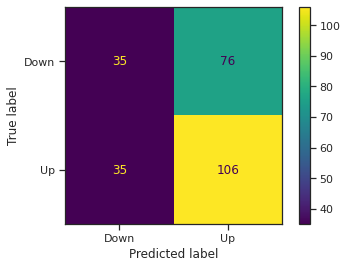

In [30]:
ConfusionMatrixDisplay.from_predictions(Smarket_test.Direction, predict_label.Direction);

In [31]:
print(classification_report(Smarket_test.Direction, predict_label.Direction))

              precision    recall  f1-score   support

        Down       0.50      0.32      0.39       111
          Up       0.58      0.75      0.66       141

    accuracy                           0.56       252
   macro avg       0.54      0.53      0.52       252
weighted avg       0.55      0.56      0.54       252



If we wanted to use a posterior probability threshold other than $50$\,\% in order to make predictions, then we could easily do so. Use a ROC curve to plot how the true positive and false positive rate change as we vary the threshold.

In [32]:
#Exercise

## 4.7.4 Quadratic Discriminant Analysis

We will now fit a QDA model to the `Smarket` data. QDA is  implemented in `pthon` using the `QuadraticDiscriminantAnalysis()` function, which is also part of the `sklearn` library. The syntax is identical to that of `LDA()`.

> `from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA`

In [33]:
sklearn_qda = QDA(store_covariance=True) #creating a QDA object
qda = sklearn_qda.fit(Smarket_train[['Lag1','Lag2']], Smarket_train.Direction) #learning the projection matrix

predict_label = qda.predict(Smarket_test[['Lag1','Lag2']]) #gives you the predicted label for each sample
predict_probs = qda.predict_proba(Smarket_test[['Lag1','Lag2']]) #the probability of each sample to belong to each class
predict_label = pd.DataFrame(predict_label, columns=["Direction"], dtype="category", index=Smarket_test.index)
predict_probs = pd.DataFrame(predict_probs, columns=qda.classes_, index=Smarket_test.index)

The output  contains the group means. But it does not contain the coefficients of the linear discriminants, because the QDA classifier involves  a quadratic, rather than a linear, function of the predictors. The `predict()` function works in exactly the same fashion as for LDA.

In [34]:
pd.DataFrame(qda.priors_[None,:], columns=qda.classes_, index=['Priors'])

,Down,Up
Priors,0.491984,0.508016


In [35]:
pd.DataFrame(qda.means_, index=qda.classes_, columns=qda.feature_names_in_)

,Lag1,Lag2
Down,0.042790,0.033894
Up,-0.039546,-0.031325


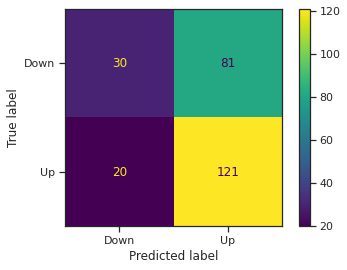

In [36]:
ConfusionMatrixDisplay.from_predictions(Smarket_test.Direction, predict_label.Direction);

In [37]:
print(classification_report(Smarket_test.Direction, predict_label.Direction))

              precision    recall  f1-score   support

        Down       0.60      0.27      0.37       111
          Up       0.60      0.86      0.71       141

    accuracy                           0.60       252
   macro avg       0.60      0.56      0.54       252
weighted avg       0.60      0.60      0.56       252



Interestingly, the QDA predictions are accurate almost $60$\,\% of the time, even though the 2005 data was not used  to fit the model. This level of accuracy is quite impressive for stock market data, which is known to be quite hard to model accurately.
This  suggests that the quadratic form assumed by QDA may capture the true relationship more accurately than the linear forms assumed by LDA and logistic regression.
 However, we recommend evaluating this method's performance on a larger test set  before betting  that this approach will consistently beat the market!

## 4.7.5 Naive Bayes

Next, we fit a naive Bayes model to the `Smarket` data. Naive Bayes is implemented in `python` using the `GaussianNB()` function, which is part of the `sklearn` library. The syntax is identical to that of `LinearDiscriminantAnalysis()` and `QuadraticDiscriminantAnalysis()`.

By default, this implementation of the naive Bayes classifier models each quantitative feature using a Gaussian distribution. 

In [38]:
# from sklearn.naive_bayes import GaussianNB as NB

              precision    recall  f1-score   support

        Down       0.59      0.26      0.36       111
          Up       0.60      0.86      0.70       141

    accuracy                           0.60       252
   macro avg       0.59      0.56      0.53       252
weighted avg       0.59      0.60      0.55       252



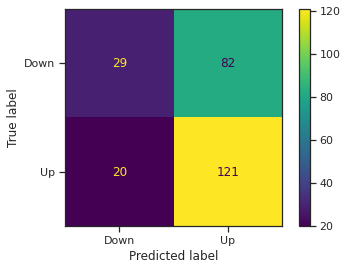

In [39]:
sklearn_nb = NB() 
nb = sklearn_nb.fit(Smarket_train[['Lag1','Lag2']], Smarket_train.Direction) #learning the projection matrix

predict_label = nb.predict(Smarket_test[['Lag1','Lag2']]) #gives you the predicted label for each sample
predict_probs = nb.predict_proba(Smarket_test[['Lag1','Lag2']]) #the probability of each sample to belong to each class
predict_label = pd.DataFrame(predict_label, columns=["Direction"], dtype="category", index=Smarket_test.index)
predict_probs = pd.DataFrame(predict_probs, columns=nb.classes_, index=Smarket_test.index)

ConfusionMatrixDisplay.from_predictions(Smarket_test.Direction, predict_label.Direction);
print(classification_report(Smarket_test.Direction, predict_label.Direction))

The `predict()` function is straightforward. Naive Bayes performs very well on this data, with accurate predictions over $59\%$ of the time. This is slightly worse than QDA, but much better than LDA. The `predict()` function can also generate estimates of the probability that each observation belongs to a particular class. %

## 4.7.6 K-Nearest Neighbors

We will now perform KNN using the `KNeighborsClassifier()` function, which is part of the `sklearn` library.

In [40]:
# from sklearn.neighbors import KNeighborsClassifier as KNN

Now the `knn()` function can be used to predict the market's movement for the dates in 2005. We set a random seed before we apply `knn()` because if several observations are tied as nearest neighbors, then `R` will randomly break the tie. Therefore, a seed must be set in order to ensure reproducibility of results.

              precision    recall  f1-score   support

        Down       0.43      0.39      0.41       111
          Up       0.55      0.59      0.57       141

    accuracy                           0.50       252
   macro avg       0.49      0.49      0.49       252
weighted avg       0.50      0.50      0.50       252



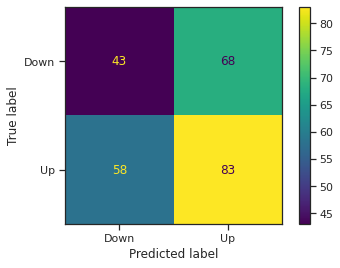

In [41]:
sklearn_knn = KNN(n_neighbors=1) 
knn = sklearn_knn.fit(Smarket_train[['Lag1','Lag2']], Smarket_train.Direction) #learning the projection matrix

predict_label = knn.predict(Smarket_test[['Lag1','Lag2']]) #gives you the predicted label for each sample
predict_probs = knn.predict_proba(Smarket_test[['Lag1','Lag2']]) #the probability of each sample to belong to each class
predict_label = pd.DataFrame(predict_label, columns=["Direction"], dtype="category", index=Smarket_test.index)
predict_probs = pd.DataFrame(predict_probs, columns=knn.classes_, index=Smarket_test.index)

ConfusionMatrixDisplay.from_predictions(Smarket_test.Direction, predict_label.Direction);
print(classification_report(Smarket_test.Direction, predict_label.Direction))

The results using $K=1$ are not very good,  since only $50$\,\% of the observations are correctly predicted. Of course, it may be that $K=1$ results in  an overly flexible fit to the data. Below, we repeat the analysis using $K=3$.

              precision    recall  f1-score   support

        Down       0.47      0.43      0.45       111
          Up       0.58      0.61      0.59       141

    accuracy                           0.53       252
   macro avg       0.52      0.52      0.52       252
weighted avg       0.53      0.53      0.53       252



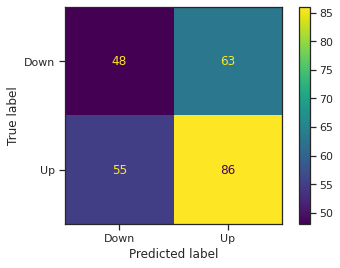

In [42]:
sklearn_knn = KNN(n_neighbors=3) 
knn = sklearn_knn.fit(Smarket_train[['Lag1','Lag2']], Smarket_train.Direction) #learning the projection matrix

predict_label = knn.predict(Smarket_test[['Lag1','Lag2']]) #gives you the predicted label for each sample
predict_probs = knn.predict_proba(Smarket_test[['Lag1','Lag2']]) #the probability of each sample to belong to each class
predict_label = pd.DataFrame(predict_label, columns=["Direction"], dtype="category", index=Smarket_test.index)
predict_probs = pd.DataFrame(predict_probs, columns=knn.classes_, index=Smarket_test.index)

ConfusionMatrixDisplay.from_predictions(Smarket_test.Direction, predict_label.Direction);
print(classification_report(Smarket_test.Direction, predict_label.Direction))

The results have improved slightly. But increasing $K$ further turns out to provide no further improvements. It appears that for this data, QDA provides the best results of the methods that we have examined so far.

              precision    recall  f1-score   support

        Down       0.46      0.64      0.54       111
          Up       0.60      0.42      0.49       141

    accuracy                           0.52       252
   macro avg       0.53      0.53      0.51       252
weighted avg       0.54      0.52      0.51       252



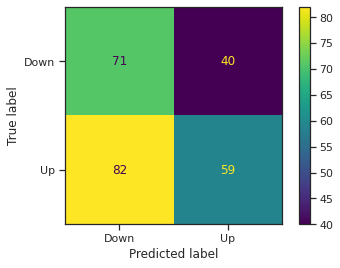

In [43]:
sklearn_knn = KNN(n_neighbors=4) 
knn = sklearn_knn.fit(Smarket_train[['Lag1','Lag2']], Smarket_train.Direction) #learning the projection matrix

predict_label = knn.predict(Smarket_test[['Lag1','Lag2']]) #gives you the predicted label for each sample
predict_probs = knn.predict_proba(Smarket_test[['Lag1','Lag2']]) #the probability of each sample to belong to each class
predict_label = pd.DataFrame(predict_label, columns=["Direction"], dtype="category", index=Smarket_test.index)
predict_probs = pd.DataFrame(predict_probs, columns=knn.classes_, index=Smarket_test.index)

ConfusionMatrixDisplay.from_predictions(Smarket_test.Direction, predict_label.Direction);
print(classification_report(Smarket_test.Direction, predict_label.Direction))

KNN does not perform well on the `Smarket` data but it does often provide impressive results. As an example we will apply the KNN approach to the `Insurance` data set, which is part of the `ISLR2` library. This data set includes $85$ predictors that measure
 demographic characteristics for 5,822 individuals. The response variable is `Purchase`, which indicates whether or not a given individual purchases a caravan insurance policy. In this data set, only $6$\,\% of people purchased caravan  insurance.


In [44]:
Caravan = pd.read_csv('https://raw.githubusercontent.com/tvanzyl/Sharing_ISL_python/master/data/Caravan.csv')

In [45]:
print(Caravan.columns)
print(Caravan.shape)
print(Caravan.describe(include="all"));

Index(['MOSTYPE', 'MAANTHUI', 'MGEMOMV', 'MGEMLEEF', 'MOSHOOFD', 'MGODRK',
       'MGODPR', 'MGODOV', 'MGODGE', 'MRELGE', 'MRELSA', 'MRELOV', 'MFALLEEN',
       'MFGEKIND', 'MFWEKIND', 'MOPLHOOG', 'MOPLMIDD', 'MOPLLAAG', 'MBERHOOG',
       'MBERZELF', 'MBERBOER', 'MBERMIDD', 'MBERARBG', 'MBERARBO', 'MSKA',
       'MSKB1', 'MSKB2', 'MSKC', 'MSKD', 'MHHUUR', 'MHKOOP', 'MAUT1', 'MAUT2',
       'MAUT0', 'MZFONDS', 'MZPART', 'MINKM30', 'MINK3045', 'MINK4575',
       'MINK7512', 'MINK123M', 'MINKGEM', 'MKOOPKLA', 'PWAPART', 'PWABEDR',
       'PWALAND', 'PPERSAUT', 'PBESAUT', 'PMOTSCO', 'PVRAAUT', 'PAANHANG',
       'PTRACTOR', 'PWERKT', 'PBROM', 'PLEVEN', 'PPERSONG', 'PGEZONG',
       'PWAOREG', 'PBRAND', 'PZEILPL', 'PPLEZIER', 'PFIETS', 'PINBOED',
       'PBYSTAND', 'AWAPART', 'AWABEDR', 'AWALAND', 'APERSAUT', 'ABESAUT',
       'AMOTSCO', 'AVRAAUT', 'AAANHANG', 'ATRACTOR', 'AWERKT', 'ABROM',
       'ALEVEN', 'APERSONG', 'AGEZONG', 'AWAOREG', 'ABRAND', 'AZEILPL',
       'APLEZIER', 'AFIETS',

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Variables that are on a large scale will have a much larger effect
 on the *distance* between the observations, and hence
on the KNN classifier, than variables that are on a small scale. For instance, imagine a data set that contains two variables, `salary` and `age` (measured in dollars and years, respectively). As far as KNN is concerned, a difference of $1,000 in salary is enormous compared to a difference of $50$~years in age. Consequently, `salary` will drive the KNN classification results, and `age` will have almost no effect. This is contrary to our intuition  that a salary difference of $$1{,}000$ is quite small compared to an age difference of $50$~years.
Furthermore, the importance of scale to the KNN classifier leads to another issue: if we measured `salary` in Japanese yen, or if we measured `age` in minutes, then we'd get quite different classification results from what we get
 if these two variables are measured in dollars and years.

In [46]:
Caravan_X= Caravan.drop('Purchase', axis =1)
Caravan_y= Caravan.Purchase.to_frame()

In [47]:
scale= StandardScaler()
np.isclose(scale.fit_transform(Caravan_X).mean(axis=0), 0)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [48]:
scale.fit_transform(Caravan_X).std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

A good way to handle this problem is to  the data so that all variables are given a mean of  zero and  a standard deviation of one. Then all variables will be on a comparable scale. The `scale()` function does just this.
 In standardizing the data, we exclude column $86$, because that is the qualitative `Purchase` variable.

We now split the observations into a test set, containing the first 1,000 observations, and a training set, containing the remaining observations.

In [49]:
X_train =Caravan_X.iloc[1000:,:]
X_test  =Caravan_X.iloc[0:1000,:]
y_train =Caravan_y.iloc[1000:]
y_test  =Caravan_y.iloc[0:1000]

Now every column of `X_train_scale` and `X_test_scale` has a standard deviation of one and a mean of zero.

In [50]:
scale= StandardScaler()
scale.fit(X_train)

X_train_scale = scale.transform(X_train)
X_test_scale  = scale.transform(X_test)


We fit  a KNN model on the training data using $K=1$, and evaluate its performance on the test data.%

              precision    recall  f1-score   support

          No       0.95      0.93      0.94       941
         Yes       0.12      0.15      0.13        59

    accuracy                           0.88      1000
   macro avg       0.53      0.54      0.54      1000
weighted avg       0.90      0.88      0.89      1000



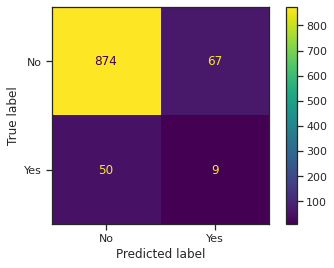

In [51]:
sklearn_knn = KNN(n_neighbors=1) 
knn = sklearn_knn.fit(X_train_scale, y_train) #learning the projection matrix

predict_label = knn.predict(X_test_scale) #gives you the predicted label for each sample
predict_probs = knn.predict_proba(X_test_scale) #the probability of each sample to belong to each class
predict_label = pd.DataFrame(predict_label, columns=["Purchase"], dtype="category", index=X_test.index)
predict_probs = pd.DataFrame(predict_probs, columns=knn.classes_, index=X_test.index)

ConfusionMatrixDisplay.from_predictions(y_test.Purchase, predict_label.Purchase);
print(classification_report(y_test.Purchase, predict_label.Purchase))

The vector `test` is numeric, with values
from  $1$ through $1,000$. Typing `X_test_scale` yields the submatrix of the data containing the observations whose indices range from $1$ to $1,000$, whereas typing 

`X_train_scale` yields the submatrix containing the observations whose indices do *not* range from $1$ to $1,000$. The KNN error rate on the 1,000 test observations is just under $12$\,\%. At first glance, this may appear to be fairly good. However, since only $6$\,\% of customers purchased insurance, we could get the error rate down to $6$\,\% by always predicting `No` regardless of the values of the predictors!

Suppose that there is some non-trivial cost to trying to sell insurance to a given individual. For instance, perhaps a salesperson must  visit each potential customer.

If the company tries to sell insurance to a random selection of customers, then the success rate will be only $6$\,\%, which may be far too low given the costs involved.

Instead, the company would like to try to sell insurance only to customers who are likely to buy it. So the  overall error rate is not of interest. Instead,  the fraction of individuals that are correctly predicted to buy insurance is of interest.

 It turns out that KNN with $K=1$ does far better than random guessing among the customers that are predicted to buy insurance. Among  $77$ such customers, $9$, or $11.7$\,\%, actually do purchase insurance.
 This is  double the rate that one would obtain from random guessing.

              precision    recall  f1-score   support

          No       0.95      0.98      0.96       941
         Yes       0.22      0.10      0.14        59

    accuracy                           0.93      1000
   macro avg       0.58      0.54      0.55      1000
weighted avg       0.90      0.93      0.91      1000



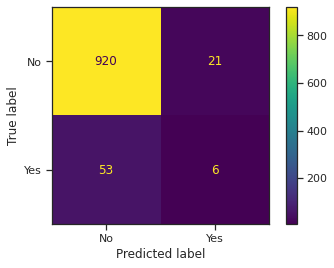

In [52]:
sklearn_knn = KNN(n_neighbors=3)
knn = sklearn_knn.fit(X_train_scale, y_train)

predict_label = knn.predict(X_test_scale) 
predict_probs = knn.predict_proba(X_test_scale) 
predict_label = pd.DataFrame(predict_label, columns=["Purchase"], dtype="category", index=X_test.index)
predict_probs = pd.DataFrame(predict_probs, columns=knn.classes_, index=X_test.index)

ConfusionMatrixDisplay.from_predictions(y_test.Purchase, predict_label.Purchase);
print(classification_report(y_test.Purchase, predict_label.Purchase))

Using $K=3$, the success rate increases to $19$\,\%, and with $K=5$ the rate is $26.7$\,\%. This is  over four times the rate that results from random guessing. It appears that KNN is finding some real patterns in a difficult data set!

              precision    recall  f1-score   support

          No       0.94      0.99      0.97       941
         Yes       0.23      0.05      0.08        59

    accuracy                           0.93      1000
   macro avg       0.59      0.52      0.52      1000
weighted avg       0.90      0.93      0.91      1000



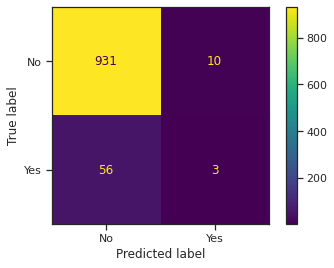

In [53]:
sklearn_knn = KNN(n_neighbors=5)
knn = sklearn_knn.fit(X_train_scale, y_train)

predict_label = knn.predict(X_test_scale) 
predict_probs = knn.predict_proba(X_test_scale) 
predict_label = pd.DataFrame(predict_label, columns=["Purchase"], dtype="category", index=X_test.index)
predict_probs = pd.DataFrame(predict_probs, columns=knn.classes_, index=X_test.index)

ConfusionMatrixDisplay.from_predictions(y_test.Purchase, predict_label.Purchase);
print(classification_report(y_test.Purchase, predict_label.Purchase))

However, while this strategy is cost-effective, it is worth noting that only 15 customers are predicted to purchase insurance using KNN with $K=5$. In practice, the insurance company may wish to expend resources on convincing more than just 15 potential customers to buy insurance.

              precision    recall  f1-score   support

          No       0.94      0.99      0.97       941
         Yes       0.00      0.00      0.00        59

    accuracy                           0.93      1000
   macro avg       0.47      0.50      0.48      1000
weighted avg       0.89      0.93      0.91      1000



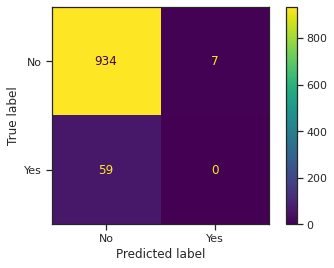

In [54]:
sklearn_lr = LR()
lr = sklearn_lr.fit(X_train_scale, y_train)

predict_label = lr.predict(X_test_scale)
predict_probs = lr.predict_proba(X_test_scale)
predict_label = pd.DataFrame(predict_label, columns=["Purchase"], dtype="category", index=X_test.index)
predict_probs = pd.DataFrame(predict_probs, columns=knn.classes_, index=X_test.index)

ConfusionMatrixDisplay.from_predictions(y_test.Purchase, predict_label.Purchase);
print(classification_report(y_test.Purchase, predict_label.Purchase))

As a comparison, we can also fit a logistic regression model to the data. If we use $0.5$ as the predicted probability cut-off for the classifier, then we have a problem: only seven of the test observations are predicted to purchase insurance. Even worse, we are wrong about all of these!

However, we are not required to use a cut-off of  $0.5$. If we instead predict a purchase any time the predicted probability of purchase exceeds  $0.25$, we get much better results: we predict that 33 people will purchase insurance, and we are correct for about $33$\,\% of these people. This is  over five times better than random guessing!

## 4.7.7 Possion Regression

Finally, we fit a  Poisson regression model to the `Bikeshare` data set, which measures the number of bike rentals (`bikers`) per hour in Washington, DC. The data can be found in the `ISLR2` library.

In [55]:
Bikeshare = pd.read_csv('https://raw.githubusercontent.com/tvanzyl/Sharing_ISL_python/master/data/Bikeshare.csv', header=0)

In [56]:
print(Bikeshare.columns)
print(Bikeshare.shape)
print(Bikeshare.describe(include="all"));

Index(['season', 'mnth', 'day', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'bikers'],
      dtype='object')
(8645, 15)
             season  mnth         day           hr      holiday      weekday  \
count   8645.000000  8645  8645.00000  8645.000000  8645.000000  8645.000000   
unique          NaN    12         NaN          NaN          NaN          NaN   
top             NaN   May         NaN          NaN          NaN          NaN   
freq            NaN   744         NaN          NaN          NaN          NaN   
mean       2.513592   NaN   184.39572    11.573626     0.027646     3.012724   
std        1.105477   NaN   104.82334     6.907822     0.163966     2.006370   
min        1.000000   NaN     1.00000     0.000000     0.000000     0.000000   
25%        2.000000   NaN    94.00000     6.000000     0.000000     1.000000   
50%        3.000000   NaN   185.00000    12.000000     0.000000     3.000

We begin by fitting a least squares linear regression model to the data.

In [57]:
lm1_bikeshare = smf.glm('bikers ~ C(mnth) + C(hr) + C(workingday) + temp + weathersit', 
                        data=Bikeshare,
                        family=sma.families.Gaussian()).fit()
print(lm1_bikeshare.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 bikers   No. Observations:                 8645
Model:                            GLM   Df Residuals:                     8605
Model Family:                Gaussian   Df Model:                           39
Link Function:               identity   Scale:                          5852.9
Method:                          IRLS   Log-Likelihood:                -49743.
Date:                Fri, 30 Sep 2022   Deviance:                   5.0364e+07
Time:                        15:15:29   Pearson chi2:                 5.04e+07
No. Iterations:                     3   Pseudo R-squ. (CS):             0.8729
Covariance Type:            nonrobust                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

Due to space constraints, we truncate the output of `summary()`.

In `lr`, the first level of `hr` (0) and `mnth` (Jan) are treated as the baseline values, and so no coefficient estimates are provided for them: implicitly, their coefficient estimates are zero, and all other levels are measured relative to these baselines. For example, the Feb coefficient of $6.845$ signifies that, holding all other variables constant, there are on average about 7 more riders in February than in January. Similarly there are about 16.5 more riders in March than in January.

The results seen in Section 4.6.1 used a slightly different coding of the variables `hr` and `mnth`, as follows:

In [58]:
lm2_bikeshare = smf.glm('bikers ~ C(mnth, Diff) + C(hr, Diff) + C(workingday) + temp + weathersit', 
                        data=Bikeshare,
                        family=sma.families.Gaussian()).fit()
print(lm2_bikeshare.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 bikers   No. Observations:                 8645
Model:                            GLM   Df Residuals:                     8605
Model Family:                Gaussian   Df Model:                           39
Link Function:               identity   Scale:                          5852.9
Method:                          IRLS   Log-Likelihood:                -49743.
Date:                Fri, 30 Sep 2022   Deviance:                   5.0364e+07
Time:                        15:15:29   Pearson chi2:                 5.04e+07
No. Iterations:                     3   Pseudo R-squ. (CS):             0.8729
Covariance Type:            nonrobust                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

What is the difference between the two codings?  In `mod.lm2`,  a coefficient estimate is reported for all but the last level of `hr` and `mnth`. Importantly, in `mod.lm2`, the coefficient estimate for the last level of `mnth` is not zero: instead, it equals the *negative of the sum of the coefficient estimates for all of the other levels*. Similarly, in `mod.lm2`, the coefficient estimate for the last level of `hr` is the negative of the sum of the coefficient estimates for all of the other levels. This means that the coefficients of `hr` and `mnth` in `mod.lm2` will always sum to zero, and can be interpreted as the difference from the mean level. For example, the coefficient for January of $-46.087$ indicates that, holding all other variables constant, there are typically 46 fewer riders in January relative to the yearly average.

It is important to realize that the choice of coding really does not matter, provided that we interpret the model output correctly in light of the coding used. For example, we see   that the predictions from the linear model are the same regardless of coding:

In [59]:
((lm1_bikeshare.predict() - lm1_bikeshare.predict())**2).sum()

0.0

The sum of squared differences is zero. We can also see this using the `all()` function:

In [60]:
(lm1_bikeshare.predict() == lm1_bikeshare.predict()).all()

True

To reproduce the left-hand side of Figure 4.13, we must first obtain the coefficient estimates associated with `mnth`. The coefficients for January through November can be obtained directly from the `mod.lm2` object. The coefficient for December must be explicitly computed as the negative sum of all the other months.

To make the plot, we manually label the $x$-axis with the names of the months.

In [66]:
# Exercise

Reproducing the right-hand side of Figure 4.13 follows a similar process.

In [ ]:
# Exercise

Now, we consider instead fitting a Poisson regression model to the `Bikeshare` data. Very little changes, except that we now use the function `glm()` with the argument `family = poisson` to specify that we wish to  fit a Poisson regression model:

In [63]:
lmp_bikeshare = smf.glm('bikers ~ C(mnth) + C(hr) + C(workingday) + temp + weathersit', 
                        data=Bikeshare, 
                        family=sma.families.Poisson()).fit()
print(lmp_bikeshare.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 bikers   No. Observations:                 8645
Model:                            GLM   Df Residuals:                     8605
Model Family:                 Poisson   Df Model:                           39
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.4054e+05
Date:                Fri, 30 Sep 2022   Deviance:                   2.2804e+05
Time:                        15:18:49   Pearson chi2:                 2.20e+05
No. Iterations:                     7   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

We can plot the coefficients associated with `mnth` and `hr`, in order to reproduce Figure 4.15:

In [ ]:
# Exercise

We can once again use the `predict()` function to obtain the fitted values (predictions) from this Poisson regression model. However, we must use the argument `type = "response"` to specify that we want `R` to output $\exp(\hat\beta_0 + \hat\beta_1 X_1 + \ldots +\hat\beta_p X_p)$ rather than $\hat\beta_0 + \hat\beta_1 X_1 + \ldots + \hat\beta_p X_p$, which it will output by default.

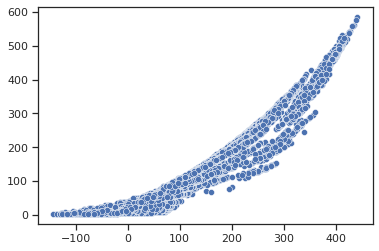

In [65]:
sns.scatterplot(lm2_bikeshare.predict(), lmp_bikeshare.predict());

The predictions from the Poisson regression model are correlated with those from the linear model; however, the former are non-negative. As a result the Poisson regression predictions tend to be larger than those from the linear model for either very low or very high levels of ridership.

In this section, we used the `glm()` function with the argument `family = poisson` in order to perform Poisson regression. Earlier in this lab we used the `glm()` function with `family = binomial` to perform logistic regression. Other choices for the `family` argument can be used to fit other types of GLMs. For instance, `family = Gamma` fits a gamma regression model.

